Random Forest
Feature taken: LBP

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"MyDrive/Machine Learning/NEU-DET-2/train/images/crazing"

/content/drive/MyDrive/Machine Learning/NEU-DET-2/train/images/crazing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import glob
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value

In [ ]:
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val

In [ ]:
X_train = list()
X_test = list()
y_train = list()
y_test = list()

In [ ]:
# 0 = crazing 
# 1 = inclusion
# 2 = patches
# 3 = pitted_surface
# 4 = rolled in scale
# 5 = scratches

In [ ]:
path = "/content/drive/MyDrive/Machine Learning/NEU-DET-2/train/images/crazing/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(0)         #append all the class in y_train

  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)

print(X_train[0])
print(len(X_train))


[[255   0 138 ... 144 224 224]
 [253 118 255 ... 143   0 193]
 [  0 160 192 ... 191   3 195]
 ...
 [254  28   2 ... 142 131 225]
 [157  30  10 ...   7 131 129]
 [143  14   6 ... 135 143   3]]
240


In [ ]:
path = "/content/drive/MyDrive/Machine Learning/NEU-DET-2/train/images/inclusion/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(1)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)



print(len(X_train))

480


In [ ]:
path = "/content/drive/MyDrive/Machine Learning/NEU-DET-2/train/images/patches/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(2)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)


print(len(X_train))

720


In [ ]:
path = "/content/drive/MyDrive/Machine Learning/NEU-DET-2/train/images/pitted_surface/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(3)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)



print(len(X_train))

960


In [ ]:
path = "/content/drive/MyDrive/Machine Learning/NEU-DET-2/train/images/rolled-in_scale/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(4)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)



print(len(X_train))

1200


In [ ]:
path = "/content/drive/MyDrive/Machine Learning/NEU-DET-2/train/images/scratches/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(5)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)



print(len(X_train))

1440


In [ ]:
# Testing

In [ ]:
path = "/content/drive/MyDrive/Machine Learning/NEU-DET-2/validation/images/crazing/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(0)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)


print(len(X_test))

60


In [ ]:
path = "/content/drive/MyDrive/Machine Learning/NEU-DET-2/validation/images/inclusion/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(1)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

120


In [ ]:
path = "/content/drive/MyDrive/Machine Learning/NEU-DET-2/validation/images/patches/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(2)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

180


In [ ]:
path = "/content/drive/MyDrive/Machine Learning/NEU-DET-2/validation/images/pitted_surface/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(3)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

240


In [ ]:
path = "/content/drive/MyDrive/Machine Learning/NEU-DET-2/validation/images/rolled-in_scale/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(4)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

300


In [ ]:
path = "/content/drive/MyDrive/Machine Learning/NEU-DET-2/validation/images/scratches/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(5)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

360


In [ ]:
print(X_train)

[array([[255,   0, 138, ..., 144, 224, 224],
       [253, 118, 255, ..., 143,   0, 193],
       [  0, 160, 192, ..., 191,   3, 195],
       ...,
       [254,  28,   2, ..., 142, 131, 225],
       [157,  30,  10, ...,   7, 131, 129],
       [143,  14,   6, ..., 135, 143,   3]], dtype=uint8), array([[  0, 247, 255, ..., 193, 213, 227],
       [ 26,   1, 212, ..., 195, 251,  97],
       [ 62, 115, 255, ..., 195, 193, 160],
       ...,
       [  0, 240, 254, ..., 255,  63,   0],
       [ 62, 121,  40, ..., 239,  92,   2],
       [  8,  12,   4, ..., 129, 143,   2]], dtype=uint8), array([[254, 127, 127, ..., 216,  32, 224],
       [241, 248, 124, ..., 255,  16, 225],
       [241, 249,   4, ..., 221,  58,  96],
       ...,
       [ 58,  12,   0, ...,  48, 233, 192],
       [ 36, 238,  15, ...,   0, 128, 131],
       [  0, 135, 143, ..., 134, 135, 131]], dtype=uint8), array([[201,   8,   8, ..., 255,   9,   0],
       [183, 255, 127, ..., 253, 102, 195],
       [ 56,  48, 252, ...,  32, 192, 

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1440, 200, 200) (1440,)
Test set: (360, 200, 200) (360,)


In [ ]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

In [ ]:
print(X_train.shape)

(1440, 40000)


In [ ]:
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

In [ ]:
print(X_test.shape)

(360, 40000)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
train_accuracy = list()
test_accuracy = list()
no_of_estimators = list()

In [ ]:
for i in range(10,100,5) :
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=i)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_train)
    #print("Train Accuracy:",metrics.accuracy_score(output_class, y_pred))
    train_accuracy.append(metrics.accuracy_score(y_train, y_pred))

    y_pred_test = clf.predict(X_test)
    #print("Test Accuracy:",metrics.accuracy_score(output_predict_class, y_pred_test))
    test_accuracy.append(metrics.accuracy_score(y_test, y_pred_test))

    no_of_estimators.append(i)

In [ ]:
print(train_accuracy)
print(test_accuracy)
print(no_of_estimators)

[0.9930555555555556, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.25277777777777777, 0.2638888888888889, 0.25277777777777777, 0.2777777777777778, 0.30833333333333335, 0.3, 0.2861111111111111, 0.2972222222222222, 0.2722222222222222, 0.3111111111111111, 0.33611111111111114, 0.31666666666666665, 0.36944444444444446, 0.325, 0.3138888888888889, 0.3333333333333333, 0.33611111111111114, 0.36666666666666664]
[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


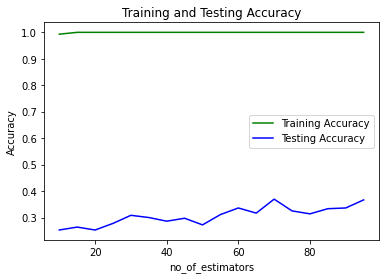

In [ ]:
plt.plot(no_of_estimators, train_accuracy, 'g', label='Training Accuracy')
plt.plot(no_of_estimators, test_accuracy, 'b', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('no_of_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
max(test_accuracy)

0.36944444444444446

In [ ]:
clf=RandomForestClassifier(n_estimators=70)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))

0.36944444444444446
[[16  2  9  8 25  0]
 [ 2 24  3 14  5 12]
 [12  3 18 12 11  4]
 [ 6 16  3 23  4  8]
 [ 9  0 17  0 34  0]
 [ 5 18 10  3  6 18]]
              precision    recall  f1-score   support

           0       0.32      0.27      0.29        60
           1       0.38      0.40      0.39        60
           2       0.30      0.30      0.30        60
           3       0.38      0.38      0.38        60
           4       0.40      0.57      0.47        60
           5       0.43      0.30      0.35        60

    accuracy                           0.37       360
   macro avg       0.37      0.37      0.36       360
weighted avg       0.37      0.37      0.36       360



In [ ]:
# every class has almost similar precision, recall, f1 score t=that is low